# L12 Game Theory

## Overview

In this notebook, we will investigate a system of cheaters and cooperators from [Gore et al.](https://www.nature.com/articles/nature07921) This work studied the dynamics of yeast populations grown on sucrose where individuals in the population can decide to either cooperate (produce the enyzme invertase to break down sucrose into glucose and fructose for them selves and the community) or defect/cheat (take up the breakdown products without producing invertase). The yeast system was developed by genetically engineering specific cooperator and cheater populations of yeast that could be measured by flow cytometry (figure), and describing their dynamics based on a game theory framework.

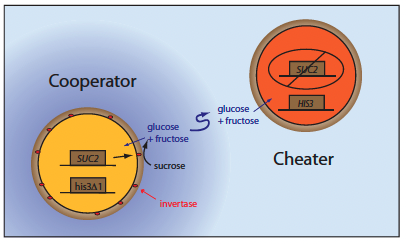



In [ ]:
%reset

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


### Game Theory

This notebook will explore the game theory used in the paper to describe the dynamics of the cheater vs. cooperater subpopulations in the community. We will start by exploring some basic concepts in game theory.


#### Prisoner's Dilemma:

Imagine that you and an accomplice have just been caught by the police for a minor crime for which you will receive 1 year of jail time. The police are also trying to get you both to confess to a larger crime and they offer you a deal. If you confess and give up your accomplice who remains silent you will get to go free. If both of you confess you will each receive 2 years of jail time for the larger crime. If you do not confess and your accomplice does you will receive 10 years of jail time for the larger crime. The stratgies of this game are to either remain silent (cooperate with your accomplice) or confess (defect).

*Payoff Matrix*

The payoff for each player of this game can be described by representing the years in jail as negative values in a payoff matrix. The rows of the matrix are the strategies you choose (cooperate or defect), and the columns are the strategies of your accomplice (cooperate or defect). The first number is your payoff and the second number is your accomplice's. For any set of strategies, the players can adjust their strategies to optimize their own individual payoff.

$\large \begin{pmatrix} -1,-1 & -10,0 \\ 0,-10 & -2,-2 \end{pmatrix}$


##### QUESTION 1:
1. In game theory, a Nash equilibrium is a state of strategies from which no player has an incentive to change strategies.
   * a. What is the Nash equilibrium for the Prisoner's Dilemma game?
   * b. What is the payoff for each player at this equilibrium point?
   * c. Does this point maximize the sum of the payoffs for all players?


#### Snowdrift Game:

Another canonical game theory example is the Snowdrift game (also known as the Hawk/Dove game or the Game of Chicken). This game applies to a scenario where two players must complete a task to receive some benefit, such as clearing a snowbank to travel down a blocked road. The task has some cost to it (neither player wants to get out of their car and clear the snow bank). The payoff matrix for some benefit $b$ and cost $c$ is described below.

*Payoff Matrix*

$\large \begin{pmatrix} b-\frac{c}{2},b-\frac{c}{2} & b-c,b \\ b,b-c & 0,0 \end{pmatrix}$

In the snowdrift game, the best individual strategy is to do the opposite of your opponent. This dynamic leads to coexistance of both strategies.

##### QUESTION 2:
2. The payoff matrix above leads to a snowdrift game when the benefit is greater than the cost $b>c$.
   * a. What type of game occurs when $b<c$ and $b>\frac{c}{2}$?
   * b. Briefly explain your answer

### Evolutionary Game Theory

In an evolutionary context, we think of a community (or population) of organisms evolving over time towards the best (or most fit) strategy. In this context, the payoff (or fitness) for a particular strategy will depend not just on the other player's strategy but on the fraction of the population that selects a particular strategy. 

For the two-strategy games discussed above, we can visualize the dynamics of strategy evolution in the population by plotting the payoff of each strategy as a function of the fraction of the community choosing a particular strategy. We will define $f$ as the fraction of the community choosing the cooperate strategy and plot the payoffs ($P_C$ for cooperate, and $P_D$ for defect) to graphically visualize these dynamics.

The endpoints of the plots, $P_C(f=0),P_C(f=1),P_D(f=0),P_D(f=1)$, can be inferred from the payoff matrices above. We will then assume that the payoffs for intermediate values of f are linearly related to these end points, although the payoff may be a more complicated function of $f$ as we will see later on in this notebook.

We will start by exploring the snowdrift game described above in an ecological context:


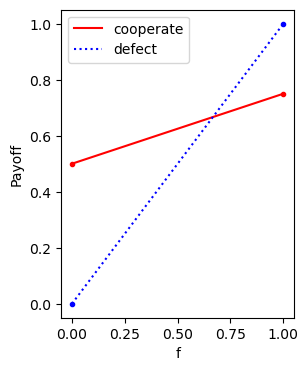

In [2]:
# Snowdrift Game
# Define cost and benefit
b = 1 #benefit
c = 0.5 #cost
# Payoff matrix (here we will just define the payoffs for you, the first player, and recall that the matrix is symetric for the second player's payoff).
PM = np.array([[b-c/2,b-c],
               [b,0]])

# Define the end points based on the payoff matrix
P_C_f_0 = PM[0,1] #you cooperate, other defects
P_C_f_1 = PM[0,0] #you cooperate, other cooperates
P_D_f_0 = PM[1,1] #you defect, other defects
P_D_f_1 = PM[1,0] #you defect, other cooperates

[fig,axs] = plt.subplots(1,1,figsize=[3,4])
axs.plot(0,P_C_f_0,'r.')
axs.plot(1,P_C_f_1,'r.')
axs.plot(0,P_D_f_0,'b.')
axs.plot(1,P_D_f_1,'b.');

# Define lines for intermeidate fitness points
f = np.linspace(0,1,100)
P_C = (P_C_f_1-P_C_f_0)*f+P_C_f_0
P_D = (P_D_f_1-P_D_f_0)*f+P_D_f_0
axs.plot(f,P_C,'r',label='cooperate')
axs.plot(f,P_D,'b:',label='defect')
axs.legend()

axs.set_xlabel('f')
axs.set_ylabel('Payoff');

For the snowdrift game, we can see that the cooperate and defect payoff lines cross. To the right of the intersection the payoff of defect is higher and to the left of the intersection the payoff of cooperate is higher. This dynamic drives the system towards a coexistance of cooperate/defect strategies that meet at the intersection of these two lines.


##### QUESTION 3:
3. The example above demonstrates the Snowdrift Game dynamics that arise when the benefit is greater than the cost ($b>c$).
   * a. Recreate the plot above for a scenario when the benefit is less than the cost ($b<c$)
   * b. and for a scenario where the cost is equal to 0 ($c=0$ and $b>0$).
   * c. Briefly describe the dynamics that result from each of these scenarios.

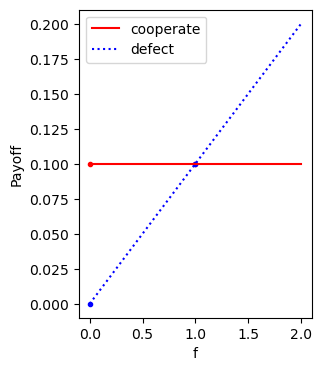

In [13]:
# b = .5 # benefit 1
# c = 1 # cost .5
b = .1 # b>0
c = 0 # c = 0
# Payoff matrix (here we will just define the payoffs for you, the first player, and recall that the matrix is symetric for the second player's payoff).
PM = np.array([[b-c/2,b-c],
               [b,0]])

# Define the end points based on the payoff matrix
P_C_f_0 = PM[0,1] #you cooperate, other defects
P_C_f_1 = PM[0,0] #you cooperate, other cooperates
P_D_f_0 = PM[1,1] #you defect, other defects
P_D_f_1 = PM[1,0] #you defect, other cooperates

[fig,axs] = plt.subplots(1,1,figsize=[3,4])
axs.plot(0,P_C_f_0,'r.')
axs.plot(1,P_C_f_1,'r.')
axs.plot(0,P_D_f_0,'b.')
axs.plot(1,P_D_f_1,'b.');

# Define lines for intermeidate fitness points
f = np.linspace(0,2,100)
P_C = (P_C_f_1-P_C_f_0)*f+P_C_f_0
P_D = (P_D_f_1-P_D_f_0)*f+P_D_f_0
axs.plot(f,P_C,'r',label='cooperate')
axs.plot(f,P_D,'b:',label='defect')
axs.legend()

axs.set_xlabel('f')
axs.set_ylabel('Payoff');

### Yeast Invertase System, Cooperators and Cheaters

The system studied in Gore. et al consisted of yeast consuming sucrose that either cooperate by producing the invertase enzyme to break down sucrose or defect (cheat) by not producing the enzyme. The payoff for this system are defined by an efficiencey $\epsilon$ and a cost $c$. Here the efficiency is the amount of benefit the cooperators extract on their own from a total benefit of 1, and the cost is the cost of cooperating. The payoffs or fitness for the two strategies were first given by the linear model below:

$\large P_D = f(1-\epsilon)$ (The defectors benefit from the net community benefit of $1-\epsilon$ proportional to cooperator density)
 
$\large P_C = f(1-\epsilon)+\epsilon-c$ (The cooperators reap the net community benefit plus the efficiency benefit minus the cost)

Figure 2 shows strategies that result from different values of the efficiency and cost under this linear model. Where PD is a Prisoner's Dilemma (all indivudals in the population defect) and MB is Mutally Beneficial (all individuals in the population cooperate).

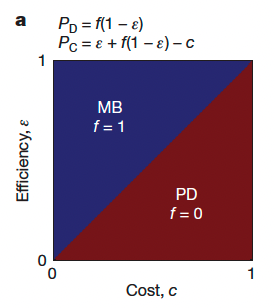

Using the equations above, we can plot the payoffs as a function of $f$ to better understand the dynamics of this system:

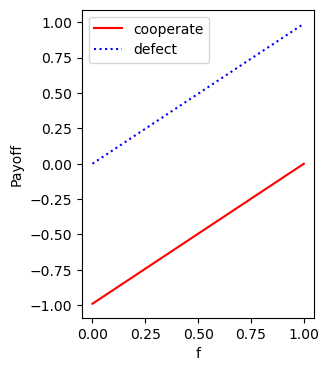

In [6]:
# plot payoffs
e = 0.01 #efficiency
c = 1 #cost
f = np.linspace(0,1,100)
P_D = f*(1-e)
P_C = f*(1-e)+e-c

[fig,axs] = plt.subplots(1,1,figsize=[3,4])
axs.plot(f,P_C,'r',label='cooperate')
axs.plot(f,P_D,'b:',label='defect')
axs.legend()
axs.set_xlabel('f')
axs.set_ylabel('Payoff');

##### QUESTION 4:
4. A situation is shown above where the cost is greater than the efficiency and the system exhibits Prisoner's Dilemma dynamics. What happens when the cost is less than the efficiency?
   * a. Include a plot (similar to the plot above)
   * b. and a brief description of the dynamics.

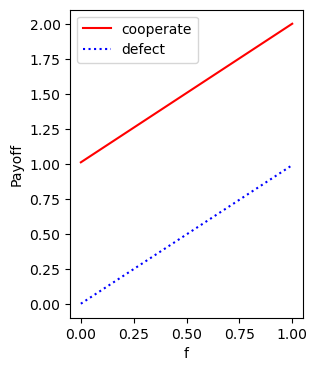

In [14]:
# question 4 plot
# e = 0.01 #efficiency
# c = 1 #cost
c = -1
e = .01
f = np.linspace(0,1,100)
P_D = f*(1-e)
P_C = f*(1-e)+e-c

[fig,axs] = plt.subplots(1,1,figsize=[3,4])
axs.plot(f,P_C,'r',label='cooperate')
axs.plot(f,P_D,'b:',label='defect')
axs.legend()
axs.set_xlabel('f')
axs.set_ylabel('Payoff');

#### Non-linear Model

The dynamics for the simple linear model above either lead to Prisoner's Dilemma or Mutually Beneficial dynamics. However, we observed (from the experiments in Gore et al.) that the real system exhibits properties of a Snowdrift Game. We can generate a model that exhibits snowdrift game dynamics by introducing non-linear payoff terms. The benefit for each organism from the glucose liberated by the invertase is non-linear (the uptake of glucose saturates after a certain amount). This non-linear effect is added to the model by including a power term $\alpha$ that is less than 1. This parameter is estimated to be around 0.15 in the paper. The payoff terms then become:

$\large P_D = [f(1-\epsilon)]^{\alpha}$ 
 
$\large P_C = [f(1-\epsilon)+\epsilon]^{\alpha}-c$

With these non-linear payoffs, there is an intermediate region of efficiency and cost parameter space that now leads to Snowdrift Game dynamcis.

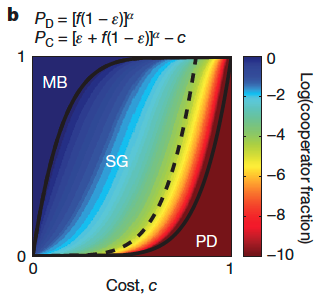

Let's look at an example of a Snowdrift Game with these non-linear payoff functions below:

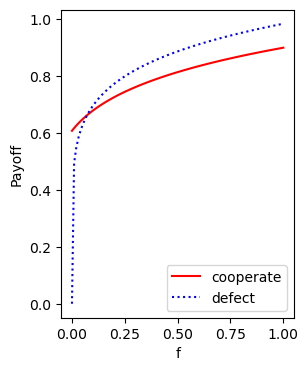

In [4]:
e = 0.1
c = 0.1
alpha = 0.15
f = np.linspace(0,1,100)
P_D = (f*(1-e))**alpha
P_C = (f*(1-e)+e)**alpha-c

[fig,axs] = plt.subplots(1,1,figsize=[3,4])
axs.plot(f,P_C,'r',label='cooperate')
axs.plot(f,P_D,'b:',label='defect')
axs.legend()
axs.set_xlabel('f')
axs.set_ylabel('Payoff');

##### QUESTION 5:
5. The example above shows Snowdrift Game dynamics. From Figure 2b we can see that the non-linear model also displays Prisoner's Dilemma or Mutually Beneficial dynamics for certain ranges of parameters. Change the efficiency to be equal to 0 ($\epsilon = 0$ and $c>0$).
   * a. What type of dynamics occur?
   * b. Include a plot similar to the plot above.
   * c. Briefly explain your answer.

#### Replicator Equation Dynamics

In evolutionary game theory, the dynamics of the strategies in the population can be represented by differential equations known as the replicator equations. The replicator equations incorporate the payoffs of each strategy into the relative fitness of those strategies to model the evolution of strategies over time.

The general representation of the replicator equations is as follows:

$\large \frac{dx_i}{dt} = x_i[f_i(x)-\phi (x)]$; $\large \phi(x) = \sum_{j=1}^{n}x_j f_j(x)$

Where $x_i$ is the fraction of strategy $i$, $f_i(x)$ is the fitness of strategy $i$ and $\phi (x)$ is the community fitness (a weighted average of all the fitness of all strategies). The replication of each strategy is proportional to the difference between that strategies fitness and the community fitness.

For the yeast system described above, the replicator equations are given by the following equation describing the rate of change of the fraction of cooperators in the community:

$\large \frac{df}{dt} = f[P_C-(fP_C+(1-f)P_D)]$

We can simulate these dynamics to understand how the parameters of the model lead to different dynamics and steady states solutions. Below we will define the differential equation for the replicator equation and simulate the dynamics of the Snowdrift Game shown above.


In [ ]:
# Define Replicator Equation Function
def RE_dynamics(t,y,e,c,alpha):
    #y = f (fraction of cooperators in community)
    if y >= 1:
        y = 1
    if y <= 0:
        y = 0
    
    P_D = (y*(1-e))**alpha
    P_C = (y*(1-e)+e)**alpha-c
    
    dydt = y*(P_C-(y*P_C+(1-y)*P_D))
        
    return dydt
    

In [ ]:
# Parameters
e = 0.1
c = 0.1
alpha = 0.15

# plot payoff
[fig,axs] = plt.subplots(1,2,figsize=[7,4])
f = np.linspace(0,1,100)
P_D = (f*(1-e))**alpha
P_C = (f*(1-e)+e)**alpha-c
axs[0].set_xlabel('f')
axs[0].set_ylabel('Payoff');
axs[0].plot(f,P_C,'r',label='cooperate')
axs[0].plot(f,P_D,'b',label='defect')
axs[0].legend()

y0s = np.linspace(0,1,50)
for i in range(len(y0s)):
    # Initial Conditions
    y0 = [y0s[i]]

    # Time span
    t = np.linspace(0,300,10000)
    tspan = [t[0],t[-1]]

    # numerical integration
    ode_sol = solve_ivp(RE_dynamics,tspan,y0, t_eval=t, args=(e,c,alpha))

    # plot dynamics
    axs[1].set_xlabel('time')
    axs[1].set_ylabel('cooprate fraction (f)')
    axs[1].plot(t,ode_sol.y[0],'k-',linewidth=0.5)

fig.tight_layout()

##### QUESTION 6:
6. The plot above shows the dynamics for a snowdrift game. Change the parameters to generate replicator equation dynamics plots for a scenario where the cost is equal to 0 ($c=0$, $\epsilon > 0$).
   * a. What type of dynamics occur?
   * b. Include plots similar to the plot above.
   * c. Briefly explain your answer.

#### BONUS 1: Recreating Figure 2b
Figure 2b from the paper shows a phase diagram for the different game dynamics that occur as we alter the parameters. The color in the plot represents the steady state fraction of cooperators in the community. We can calculate this value numerically by running the replicator equation dynamics and seeing where $f$ ends up. To recreate Figure 2b, we run the replicator equations for a range of efficiency and cost parameters and plot the steady state value of $f$.

In [ ]:
# Recreating figure 2b from the paper

es = np.linspace(0,1,50)
cs = np.linspace(0,1,50)
f = np.zeros([len(es),len(cs)])

for ei in range(len(es)):
    for ci in range (len(cs)):
        # Parameters
        e = es[ei]
        c = cs[ci]
        alpha = 0.15

        # Initial Conditions
        y0 = [0.5]

        # Time span
        t = np.linspace(0,500,1000)
        tspan = [t[0],t[-1]]

        # numerical integration
        ode_sol = solve_ivp(RE_dynamics,tspan,y0, t_eval=t, args=(e,c,alpha))

        f[ei,ci] = ode_sol.y[0][-1]

In [ ]:
[fig,axs] = plt.subplots(1,1,figsize=[5,5])
f_z = f.copy()
f_z[f_z<=0]=np.min(np.abs(f))
im = axs.imshow(np.log(f_z),origin='lower',cmap='jet_r',interpolation='none');
axs.set_xticks(np.linspace(0,len(es)-1,10))
axs.set_yticks(np.linspace(0,len(es)-1,10));
axs.set_xticklabels(np.round(np.linspace(0,1,10),1))
axs.set_yticklabels(np.round(np.linspace(0,1,10),1));
axs.set_xlabel('cost (c)')
axs.set_ylabel('efficiency (e)')
fig.colorbar(im);

#### BONUS 2: Alternative model for non-linear payoffs
In the paper, a power function was used to introduce a non-linear relationship between glucose availability and payoff. We can also use a different function for this form that we are more familiar with in this context (the Michaelis Menten equation, or more generally a Hill equation). That implementation is shown below where $B_C$ and $B_D$ are defined as the benefits to simplify the notation.

From the plot below, we can see that these equations also lead to snowdrift game dynamics for a certain range of parameters.

$\large P_D = \frac{B_D^n}{K_M^n+B_D^n}$; $\large B_D = f(1-\epsilon)$
 
$\large P_C = \frac{B_C^n}{K_M^n+B_C^n}-c$; $\large B_C = f(1-\epsilon)+\epsilon$

In [ ]:
# Define Replicator Equation Function
def RE_MM_dynamics(t,y,e,c,K_M,n):
    #y = f (fraction of cooperators in community)
    if y >= 1:
        y = 1
    if y <= 0:
        y = 0

    f = y
    B_D = f*(1-e)
    P_D = B_D**n/(K_M**n+B_D**n)
    B_C = f*(1-e)+e
    P_C = B_C**n/(K_M**n+B_C**n)-c
    
    dydt = y*(P_C-(y*P_C+(1-y)*P_D))
        
    return dydt

In [ ]:
# Parameters
e = 0.1
c = 0.1
K_M = 0.5
n = 1

# plot payoff
[fig,axs] = plt.subplots(1,2,figsize=[7,4])
f = np.linspace(0,1,100)
B_D = f*(1-e)
P_D = B_D**n/(K_M**n+B_D**n)
B_C = f*(1-e)+e
P_C = B_C**n/(K_M**n+B_C**n)-c

axs[0].set_xlabel('f')
axs[0].set_ylabel('Payoff');
axs[0].plot(f,P_C,'r',label='cooperate')
axs[0].plot(f,P_D,'b',label='defect')
axs[0].legend()

y0s = np.linspace(0,1,50)
for i in range(len(y0s)):
    # Initial Conditions
    y0 = [y0s[i]]

    # Time span
    t = np.linspace(0,300,10000)
    tspan = [t[0],t[-1]]

    # numerical integration
    ode_sol = solve_ivp(RE_MM_dynamics,tspan,y0, t_eval=t, args=(e,c,K_M,n))

    # plot dynamics
    axs[1].set_xlabel('time')
    axs[1].set_ylabel('cooperate fraction (f)')
    axs[1].plot(t,ode_sol.y[0],'k-',linewidth=0.5)

fig.tight_layout()

And with cooperativity ($n>1$) we can get bistable dynamics.

In [ ]:
# Parameters
e = 0.1
c = 0.1
K_M = 0.5
n = 2

# plot payoff
[fig,axs] = plt.subplots(1,2,figsize=[7,4])
f = np.linspace(0,1,100)
B_D = f*(1-e)
P_D = B_D**n/(K_M**n+B_D**n)
B_C = f*(1-e)+e
P_C = B_C**n/(K_M**n+B_C**n)-c

axs[0].set_xlabel('f')
axs[0].set_ylabel('Payoff');
axs[0].plot(f,P_C,'r',label='cooperate')
axs[0].plot(f,P_D,'b',label='defect')
axs[0].legend()

y0s = np.linspace(0,1,50)
for i in range(len(y0s)):
    # Initial Conditions
    y0 = [y0s[i]]

    # Time span
    t = np.linspace(0,300,10000)
    tspan = [t[0],t[-1]]

    # numerical integration
    ode_sol = solve_ivp(RE_MM_dynamics,tspan,y0, t_eval=t, args=(e,c,K_M,n))

    # plot dynamics
    axs[1].set_xlabel('time')
    axs[1].set_ylabel('cooperate fraction (f)')
    axs[1].plot(t,ode_sol.y[0],'k-',linewidth=0.5)

fig.tight_layout()